In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.loader import DataCollector
from scripts.models import SMModel
from scripts.utils import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Green Energy

In [2]:
# collect and split processed data
dc = DataCollector()
test = dc.get_test_data(path='data/test.csv')
train, val = dc.collect_split_data(path_to_train='data/train.csv')

In [3]:
for mod in ['DTW']:
    model = SMModel(mod)
    model.fit_(train[['energy']])
    preds = model.predict_([1], [2], dtw_train=train['energy'], dtw_test=val['energy'])

    print(f"#### {mod} MODEL ####")
    print(preds)
    summ_and_score(model.model, val['energy'], preds)
    plot_preds(val, preds)


TEST output = DTW alignment object of size (query x reference): 1 x 1


TypeError: float() argument must be a string or a number, not 'DTW'

## UK Electricity Demand

In [5]:
# collect and split processed data
dc2 = DataCollector()
dat = pd.read_csv('data/ukdemand_09-23.csv', parse_dates=['settlement_date'])
dat.columns = ['settlement_date', 'settlement_period', 'period_hour', 'demand_mw', 'trans_demand_mw',
                'england_wales_demand', 'est_wind_generation_mw',
                'est_wind_capacity_mw', 'est_solar_generation_mw',
                'est_solar_capacity_mw', 'st_reserve_mw', 'pump_storage',
                'ifa_flow', 'ifa2_flow', 'britned_flow', 'moyle_flow', 'east_west_flow',
                'nemo_flow', 'is_holiday']
                
dat = dat.drop(['period_hour', 'ifa_flow', 'ifa2_flow', 'britned_flow',
              'moyle_flow', 'east_west_flow', 'nemo_flow', 'is_holiday'],
              axis=1)

test2 = dat[dat.settlement_date.dt.year.isin([2021, 2022])]
train2 = dat[dat.settlement_date.dt.year <= 2018]
val2 = dat[dat.settlement_date.dt.year.isin([2019, 2020])]


#### AR MODEL ####
                            AutoReg Model Results                             
Dep. Variable:              demand_mw   No. Observations:               174556
Model:                     AutoReg(1)   Log Likelihood            -1475390.342
Method:               Conditional MLE   S.D. of innovations           1133.830
Date:                Thu, 02 Feb 2023   AIC                        2950786.684
Time:                        23:28:24   BIC                        2950816.894
Sample:                             1   HQIC                       2950795.629
                               174556                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          364.7755     12.114     30.111      0.000     341.032     388.519
demand_mw.L1     0.9891      0.000   2807.840      0.000       0.988       0.990
                         

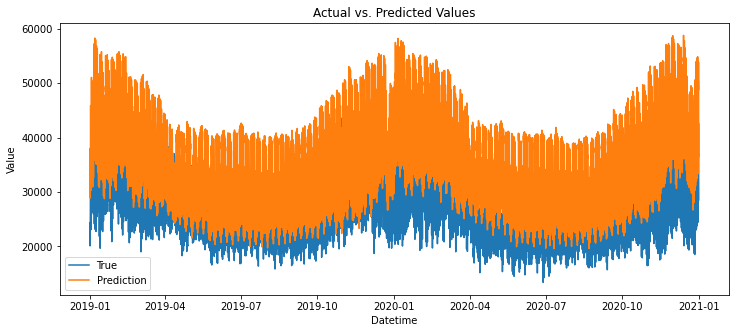

#### ARIMA MODEL ####
                               SARIMAX Results                                
Dep. Variable:              demand_mw   No. Observations:               174556
Model:                 ARIMA(1, 1, 1)   Log Likelihood            -1344343.143
Date:                Thu, 02 Feb 2023   AIC                        2688692.286
Time:                        23:28:39   BIC                        2688722.496
Sample:                             0   HQIC                       2688701.230
                             - 174556                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8238      0.001    946.153      0.000       0.822       0.826
ma.L1          0.2339      0.002    103.861      0.000       0.230       0.238
sigma2      2.884e+05    626.2

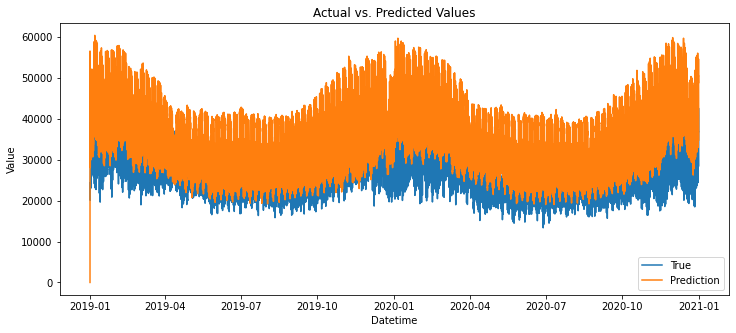

#### SARIMA MODEL ####
                               SARIMAX Results                                
Dep. Variable:              demand_mw   No. Observations:               174556
Model:               SARIMAX(1, 1, 1)   Log Likelihood            -1344343.143
Date:                Thu, 02 Feb 2023   AIC                        2688692.286
Time:                        23:29:21   BIC                        2688722.496
Sample:                             0   HQIC                       2688701.230
                             - 174556                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8238      0.001    946.153      0.000       0.822       0.826
ma.L1          0.2339      0.002    103.861      0.000       0.230       0.238
sigma2      2.884e+05    626.

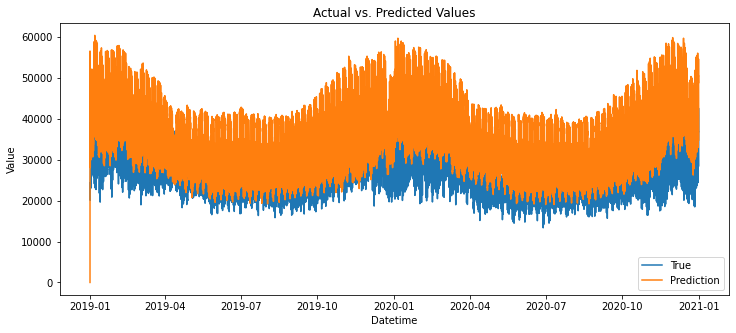

In [9]:
for mod in ['AR', 'ARIMA', 'SARIMA']:
    model = SMModel(mod)
    model.fit_(train2[['demand_mw']])
    preds2 = model.predict_(0, len(val2)-1)

    print(f"#### {mod} MODEL ####")
    summ_and_score(model.model, val2['demand_mw'], preds2)
    plot_preds(val2, preds2, 'settlement_date', 'demand_mw')
